In [2]:
from __future__ import division

import numpy as np
np.random.seed(0)
import scipy.linalg

import mltools as ml
import sys
sys.path.append('code')

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
plt.set_cmap('jet');
%matplotlib inline
import warnings
warnings.filterwarnings('ignore'); # for deprecated matplotlib functions

### 1.1

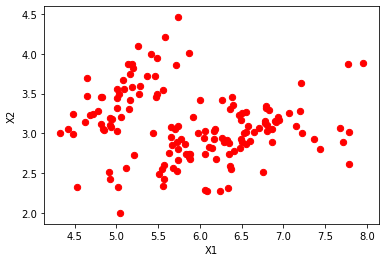

In [7]:
iris = np.genfromtxt("data\iris.txt", delimiter = None)
X1 = iris[:,0]
X2 = iris[:,1]

#plt.plot(X1, '-r')
#plt.plot(X2, '-g')
plt.scatter(X1, X2, s = 40, c = "red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

I think there are two clusters in the plot above in terms of 'location' because in these clusters, the points seem to be gathered and grouped together. One cluster is between X1=5.5 and X1=7.0. The other cluster is between X1=4.5 and X1=5.3. The points are grouped in these clusters. 

### 1.2

57.87966196118197
57.877648396983034
57.877648396983034


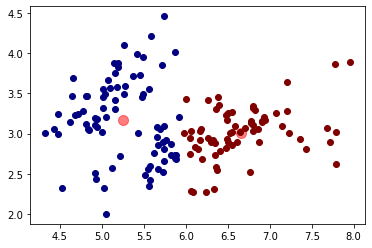

25.138941899584196
20.954630196254048
25.412400972159052


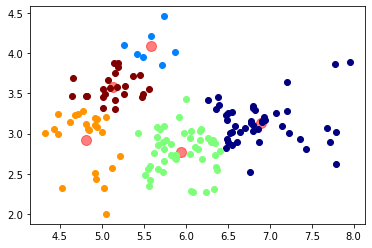

5.129966686091352
4.560945144877734
4.587343635791365


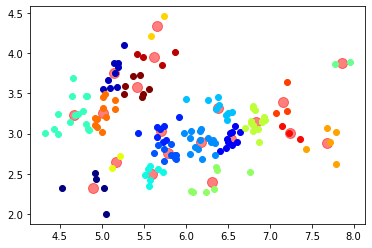

In [8]:
X12 = iris[:,0:2]
Z, c, ssd = ml.cluster.kmeans(X12, K=2, init = 'random')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=2, init = 'farthest')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=2, init = 'k++')  #'random' or farthest, or k++
print(ssd)
ml.plotClassify2D(None, X12, Z)
plt.scatter(c[:,0], c[:,1], c = 'red', s = 100, alpha = 0.5)
plt.show()
Z, c, ssd = ml.cluster.kmeans(X12, K=5, init = 'random')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=5, init = 'farthest')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=5, init = 'k++')  #'random' or farthest, or k++
print(ssd)
ml.plotClassify2D(None,X12, Z)
plt.scatter(c[:,0], c[:,1], c = 'red', s = 100, alpha = 0.5)
plt.show()
Z, c, ssd = ml.cluster.kmeans(X12, K=20, init = 'random')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=20, init = 'farthest')  #'random' or farthest, or k++
print(ssd)
Z, c, ssd = ml.cluster.kmeans(X12, K=20, init = 'k++')  #'random' or farthest, or k++
print(ssd)


ml.plotClassify2D(None, X12, Z)
plt.scatter(c[:,0], c[:,1], c = 'red', s = 100, alpha = 0.5)
plt.show()

### 1.3

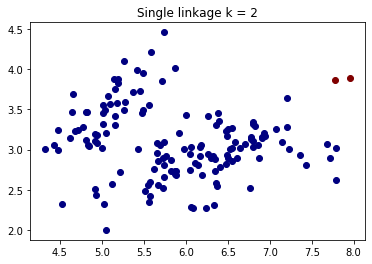

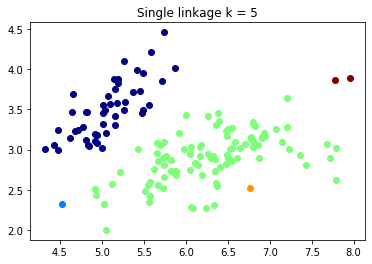

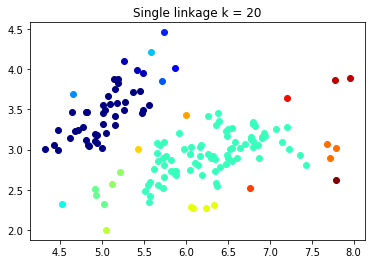

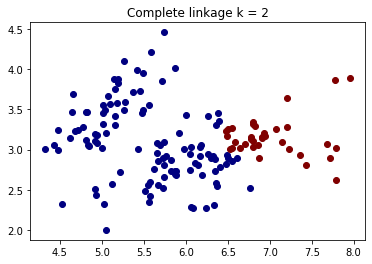

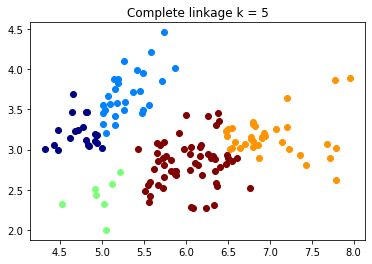

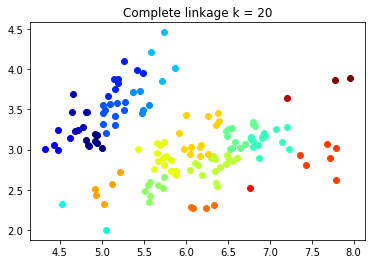

In [21]:
z2s, jo2s = ml.cluster.agglomerative(X12, K=2, method = 'min')   #single linkage(min)
z5s, jo5s = ml.cluster.agglomerative(X12, K=5, method = 'min')
z20s, jo20s = ml.cluster.agglomerative(X12, K=20, method = 'min')

ml.plotClassify2D(None, X12, z2s)
plt.title("Single linkage k = 2")
plt.show()
ml.plotClassify2D(None, X12, z5s)
plt.title("Single linkage k = 5")
plt.show()
ml.plotClassify2D(None, X12, z20s)
plt.title("Single linkage k = 20")
plt.show()

z2c, jo2c = ml.cluster.agglomerative(X12, K=2, method = 'max')   #complete linkage(max)
z5c, jo5c = ml.cluster.agglomerative(X12, K=5, method = 'max')
z20c, jo20c = ml.cluster.agglomerative(X12, K=20, method = 'max')

ml.plotClassify2D(None, X12, z2c)
plt.title("Complete linkage k = 2")
plt.show()
ml.plotClassify2D(None, X12, z5c)
plt.title("Complete linkage k = 5")
plt.show()
ml.plotClassify2D(None, X12, z20c)
plt.title("Complete linkage k = 20")
plt.show()



### 1.4

When I used complete linkage, the outputs of the agglomerative clustering and k-means algorithms are very similar. It seems that agglomerative clustering has a little more bigger clusters. However, when I used single linkage, the outputs are very different. The output of the agglomerative clustering has a big cluster and some clusters consiting of dots whereas the k-means algorithm has multiple smaller clusters. 

# Problem 2

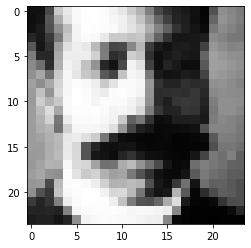

In [4]:
X = np.genfromtxt("data/faces.txt", delimiter=None)
plt.figure()

img = np.reshape(X[1,:], (24,24))
plt.imshow(img.T, cmap = 'gray')

### 2.1

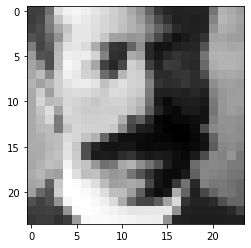

In [10]:
mu = np.mean(X, axis = 0)
X0 = X-mu


#X0 = np.subtract(X[1,:], np.mean(X, axis = 0, keepdims = True))
plt.figure()

mean_face = np.reshape(X0[1,:], (24,24))
plt.imshow(mean_face.T, cmap = 'gray')

### 2.2

In [11]:
U, S, Vh = scipy.linalg.svd(X0, full_matrices = False)
W = U.dot( np.diag(S))

print("W's shape is: ", W.shape)
print("Vh's shape is: ", Vh.shape)

W's shape is:  (4916, 576)
Vh's shape is:  (576, 576)


### 2.3

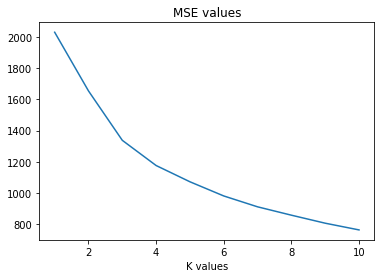

In [24]:
mse = np.zeros(10)
for k in range(1,11):
    X0_hat = np.dot(W[:,:k], Vh[:k,:])
    mse[k-1] = (np.mean( (X0 - X0_hat) ** 2))

plt.plot(np.arange(1,11,1), mse)
plt.xlabel("K values")
plt.title("MSE values")
plt.show()



### 2.4

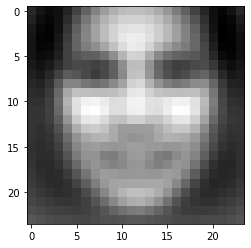

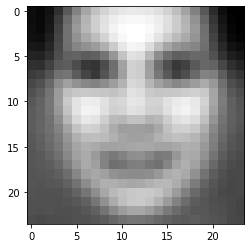

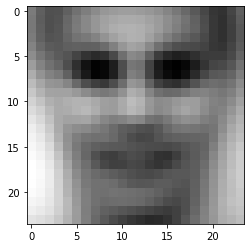

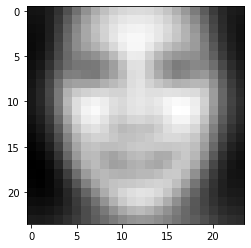

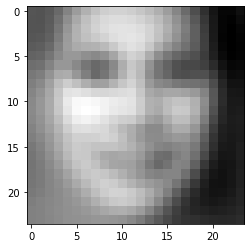

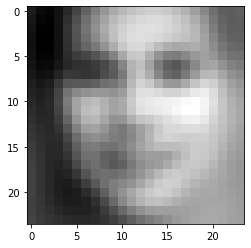

In [13]:
for j in range(3):
    alpha = 2*np.median(np.abs(W[:,j]))
    upper = mu + alpha * Vh[j,:]
    lower = mu - alpha * Vh[j,:]
    upper_reshaped = np.reshape(upper, (24,24))
    plt.imshow(upper_reshaped.T, cmap = 'gray')
    plt.show()
    
    lower_reshaped = np.reshape(lower, (24,24))
    plt.imshow(lower_reshaped.T, cmap = 'gray')
    plt.show()




### 2.5

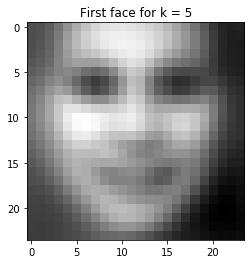

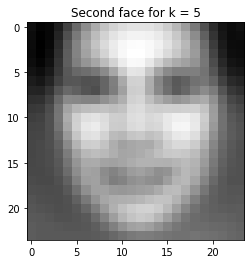

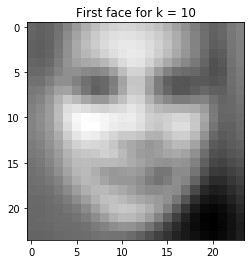

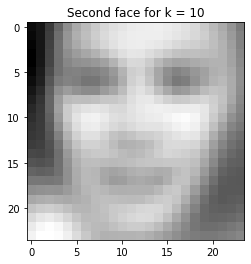

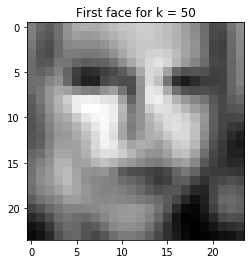

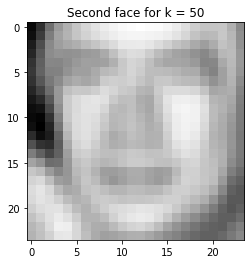

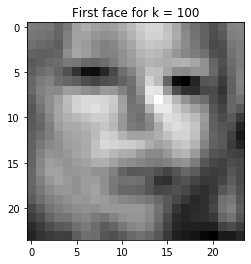

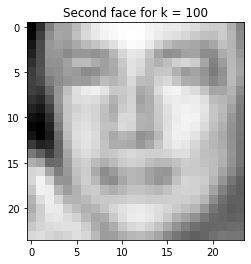

In [25]:
first_face_num = np.random.randint(X.shape[0])
second_face_num = np.random.randint(X.shape[0])

for j in [5,10,50,100]:
    X0_hat = np.dot(W[:,:j], Vh[:j,:])
    first_face = X0_hat[first_face_num,:] + mu
    second_face = X0_hat[second_face_num,:] + mu
     
    first_reshaped = np.reshape(first_face, (24,24))
    plt.title("First face for k = " + str(j))
    plt.imshow(first_reshaped.T, cmap = 'gray')
    plt.show()
    
    second_reshaped = np.reshape(second_face, (24,24))
    plt.title("Second face for k = " + str(j))
    plt.imshow(second_reshaped.T, cmap = 'gray')
    plt.show()





### 2.6

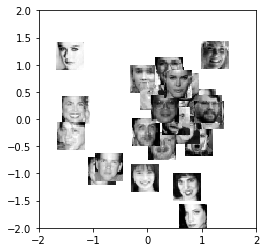

In [231]:
#idx = np.zeros(25)
idx = []
for i in range(25):
    idx.append(np.random.randint(X.shape[0]))    #idx = 25 random integers(indexes of faces)

import mltools.transforms
coord, params = ml.transforms.rescale( W[:,0:2])
plt.figure()
for i in idx:
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i,1] + 0.5)
    img = np.reshape( X[i,:], (24, 24))
    plt.imshow(img.T, cmap = 'gray', extent = loc)
    plt.axis( (-2, 2, -2, 2) )







### 3 Statement of Collaboration

I mostly worked independently. However, I did use some piazza discussions for clarification of the problem 2.4. I also used the discussion codes for problem 2.5. 

### 4. Course Evaluation

I did the course evaluation!